Estimate Medical Charges

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import plotly.express as px
import numpy as np
from sklearn.linear_model import LinearRegression
file=pd.read_csv("medical.csv")

smoker_value={"no":0,"yes":1}
file["smoker"]=file["smoker"].map(smoker_value)

sex_value={"male":1,"female":0}
file["sex"]=file["sex"].map(sex_value)


file

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


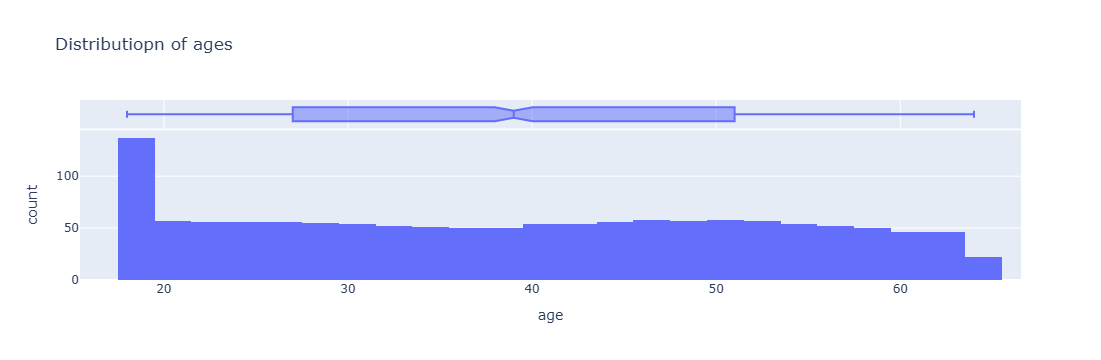

In [96]:
fig=px.histogram(file,x='age',marginal='box',title="Distributiopn of ages")
fig.show()

In [97]:
fg=px.scatter(file,x="age",y="charges", color="smoker",color_discrete_sequence=["red","green"])
fg.show()

In [98]:
fg=px.histogram(file,x="charges",color="smoker", color_discrete_sequence=["red","green"], title="Medical_charge")
fg.show()

In [4]:
file.smoker.value_counts()

smoker
0    1064
1     274
Name: count, dtype: int64

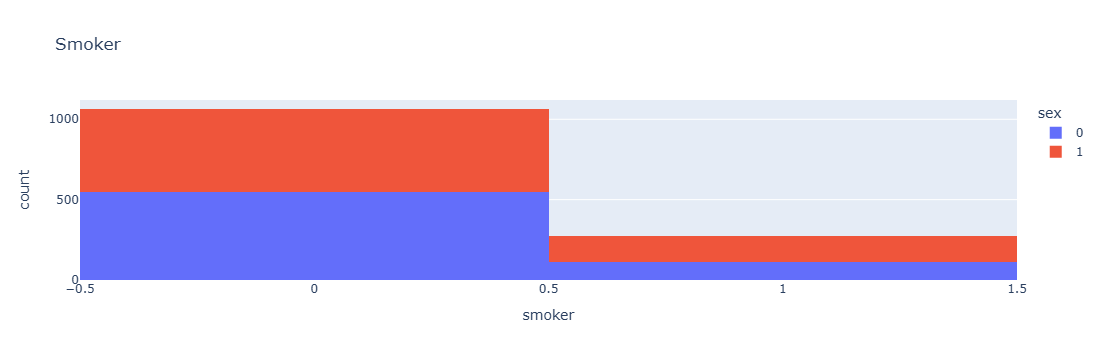

In [6]:
fg=px.histogram(file,x="smoker",color="sex",title="Smoker")
fg.show()

In [101]:
fg=px.scatter(file,x="bmi",y="charges",color="smoker",color_discrete_sequence=["red","green"])
fg.show()

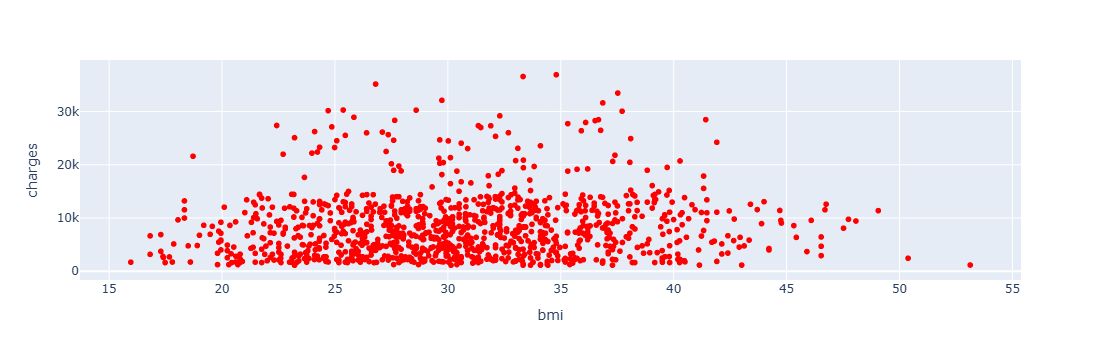

In [7]:
import plotly.express as px
non_smoker=file[file["smoker"]==0]
fg=px.scatter(non_smoker,x="bmi",y="charges",color_discrete_sequence=["red"])
fg.show()

In [8]:
#Correlation of Charges with ages of a 
file.charges.corr(file.age)

0.29900819333064765

In [9]:
#Correlation of Charges with children of a person
file.charges.corr(file.children)

0.06799822684790487

In [105]:
#Correlation of Charges with bmi of a person
file.charges.corr(file.bmi)

0.19834096883362892

In [106]:
#Correlation of Charges with smoking of a person
file.charges.corr(file.smoker)

0.7872514304984772

In [107]:
#Correlation of Charges with ses of a person
file.charges.corr(file.sex)

0.057292062202025415

<Axes: title={'center': 'Age Vs Charges'}, xlabel='age', ylabel='charges'>

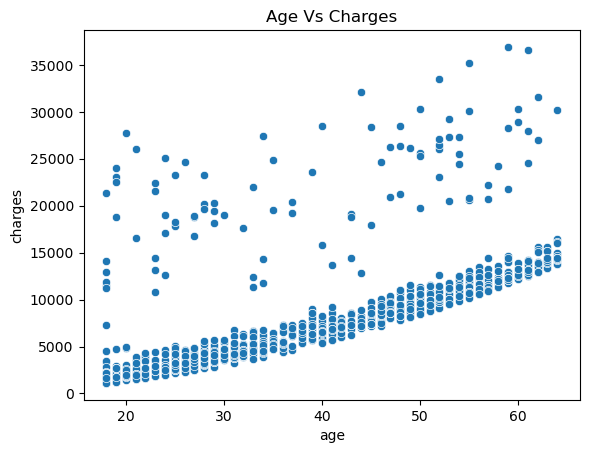

In [10]:

plt.title("Age Vs Charges")
sns.scatterplot(data=non_smoker,x="age",y="charges")

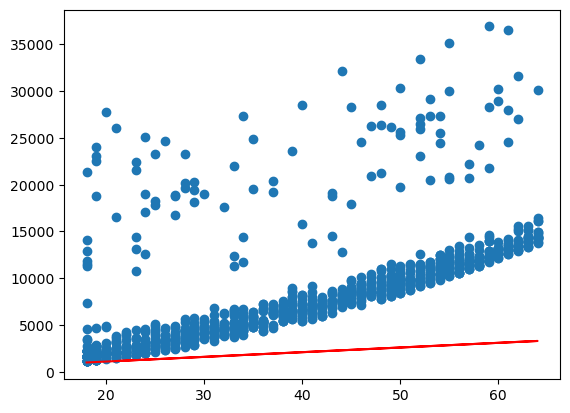

In [12]:
def estimate(age,w,b):
    return w*age+b
    
w=50
b=100

age1=non_smoker[["age"]]
charge1=non_smoker[["charges"]]
estimate_charge=estimate(age1,w,b)
estimate_charge
#Only fr Non_smoker

plt.plot(age1,estimate_charge,'r')
plt.scatter(age1,charge1)

RMSE for w=370, b=-6500: nan


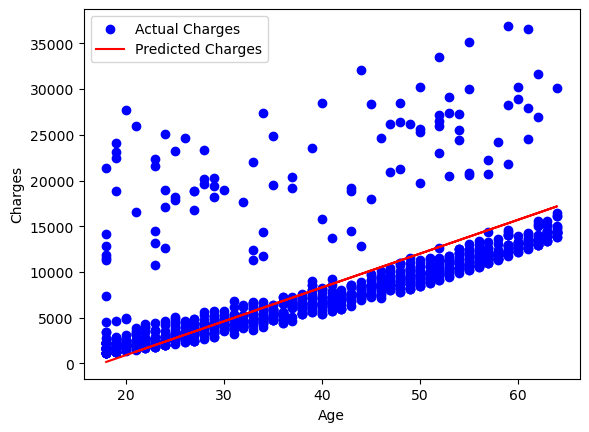

(1064, 1)

In [13]:
def estimate(age,w,b):
    return w*age+b
    
def rmse(targets,predictions):
    return np.sqrt(np.mean(np.square(targets-predictions)))
    
def tryParameter(w,b):
    ageo=non_smoker[["age"]]
    chargeo=non_smoker[["charges"]]
    estimated_charge=estimate(ageo,w,b)
    
  # Calculate RMSE
    error = rmse(chargeo, estimated_charge)
    print(f"RMSE for w={w}, b={b}: {error}")

    # Plot actual vs predicted
    plt.scatter(ageo, chargeo, color="blue", label="Actual Charges")
    plt.plot(ageo, estimated_charge, color="red", label="Predicted Charges")
    plt.xlabel("Age")
    plt.ylabel("Charges")
    plt.legend()
    plt.show()

# Initial parameters
w = 370
b = -6500

# Call the function
tryParameter(w, b)
age1.shape

In [15]:
model=LinearRegression()
model.fit(age1,charge1) #inside model line is fitted whivch make rmse low as possible

LinearRegression()

In [16]:
model.predict(np.array([[18],[37],[61]])) # for 3 ages 

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([[ 2719.0598744 ],
       [ 7796.78921819],
       [14210.76312614]])

In [164]:
charge1
#model.predict(age1)

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [17]:
model.coef_

array([[267.24891283]])

In [18]:
model.intercept_

array([-2091.42055657])

RMSE for w=[[267.24891283]], b=[-2091.42055657]: nan


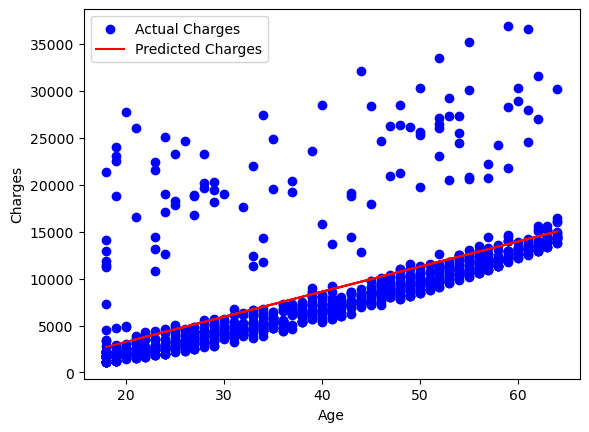

In [19]:
tryParameter(model.coef_,model.intercept_)

In [22]:
inputs,targets=file[['age']],file['charges']
model=LinearRegression().fit(inputs,targets)
predictions=model.predict(inputs)
loss=rmse(targets,predictions)
print("Loss-",loss)


Loss- 11551.66562075632


In [23]:
inputs,targets=file[["age","bmi","children"]],file["charges"]
model=LinearRegression().fit(inputs,targets)
predictions=model.predict(inputs)
loss=rmse(targets,predictions)
print("loss:-",loss)

loss:- 11355.317901125973


In [24]:
non_smoker.charges.corr(non_smoker.bmi) #Relation of charges with bmi  slight 

0.08403654312833272

Text(0, 0.5, 'chargess')

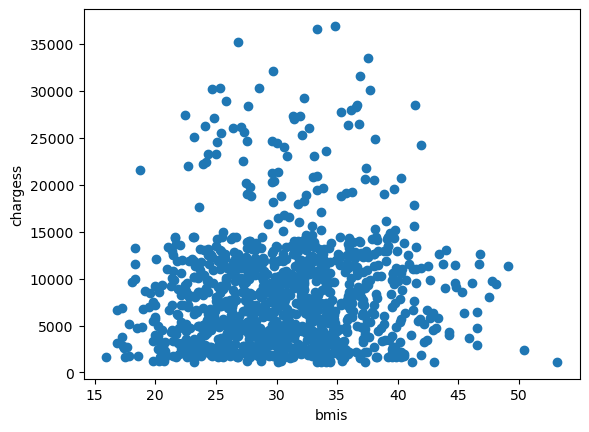

In [179]:
model.coef_,model.intercept_

(array([239.99447429, 332.0833645 , 542.86465225]), -6916.243347787033)

In [25]:
inputs,targets=file[["age","smoker"]],file["charges"]
model=LinearRegression().fit(inputs,targets)
predictions=model.predict(inputs)
loss=rmse(targets,predictions)
print("loss:-",loss)

loss:- 6389.576957226424


In [26]:
from sklearn import preprocessing
enc=preprocessing.OneHotEncoder()
enc.fit(file[["region"]])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [27]:
one_hot=enc.transform(file[["region"]]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [28]:
file[['northeast', 'northwest', 'southeast', 'southwest']]=one_hot

In [29]:
file

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,southeast,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,southeast,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,northwest,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,northwest,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830,0.0,1.0,0.0,0.0
1334,18,0,31.920,0,0,northeast,2205.98080,1.0,0.0,0.0,0.0
1335,18,0,36.850,0,0,southeast,1629.83350,0.0,0.0,1.0,0.0
1336,21,0,25.800,0,0,southwest,2007.94500,0.0,0.0,0.0,1.0


In [30]:
file.drop(columns=["region"], inplace=True)


In [31]:
inputs_col=["age","bmi","children","sex","smoker","northeast","northwest","southeast","southwest"]
inputs,targets=file[inputs_col],file["charges"]
#from sklearn.linear_model import LinearRegression
model=LinearRegression().fit(inputs,targets)
predictions=model.predict(inputs)
loss=rmse(targets,predictions)
print("Loss",loss)

Loss 6041.6796511744515


In [32]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515,  -131.3143594 ,
       23848.53454191,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])